In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import csv2rec
import nitime

# Import the time-series objects:
from nitime.timeseries import TimeSeries

# Import the analysis objects:
from nitime.analysis import SpectralAnalyzer, FilterAnalyzer, NormalizationAnalyzer

In [4]:
data = np.load('../../smoothed_data.npy')
# data = np.load('../../val_runs.npy')

In [5]:
data.shape

(132, 175, 48, 100)

In [6]:
data2d = data.reshape((data.shape[0]*data.shape[1]*data.shape[2],data.shape[3]))

In [7]:
data2d.shape

(1108800, 100)

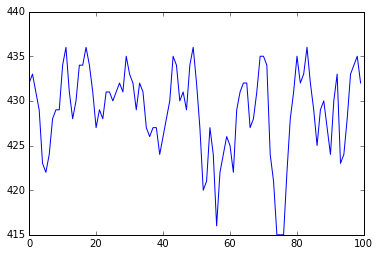

In [29]:
plt.plot(data2d[87440,:])


In [10]:
TR = 2

In [11]:
T = TimeSeries(data2d, sampling_interval=TR)

In [12]:
S_original = SpectralAnalyzer(T)

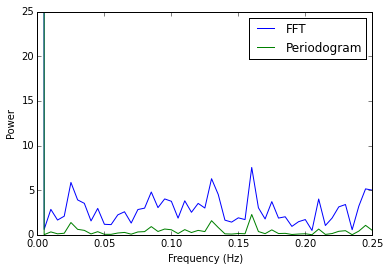

In [13]:
fig01 = plt.figure()
ax01 = fig01.add_subplot(1, 1, 1)
# ax01.plot(S_original.psd[0],
#           S_original.psd[1][9],
#           label='Welch PSD')

ax01.plot(S_original.spectrum_fourier[0],
          np.abs(S_original.spectrum_fourier[1][9]),
          label='FFT')

ax01.plot(S_original.periodogram[0],
          S_original.periodogram[1][9],
          label='Periodogram')

# ax01.plot(S_original.spectrum_multi_taper[0],
#           S_original.spectrum_multi_taper[1][9],
#           label='Multi-taper')

ax01.set_xlabel('Frequency (Hz)')
ax01.set_ylabel('Power')
plt.ylim((0,25))

ax01.legend()
plt.savefig("../figure/FFT.jpg")

IOError: [Errno 28] No space left on device: '../figure/data_filtering_on_smoothed_data.jpg'

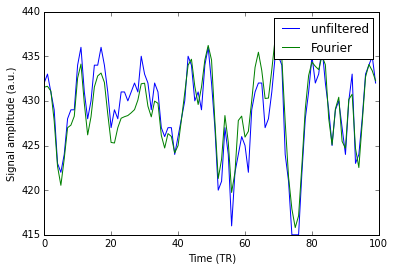

In [62]:
F = FilterAnalyzer(T, ub=0.15, lb=0.02)

# Initialize a figure to display the results:
fig02 = plt.figure()
ax02 = fig02.add_subplot(1, 1, 1)

# Plot the original, unfiltered data:
ax02.plot(F.data[87440], label='unfiltered')

# ax02.plot(F.filtered_boxcar.data[89], label='Boxcar filter')

# ax02.plot(F.fir.data[89], label='FIR')

# ax02.plot(F.iir.data[89], label='IIR')

ax02.plot(F.filtered_fourier.data[87440], label='Fourier')
ax02.legend()
ax02.set_xlabel('Time (TR)')
ax02.set_ylabel('Signal amplitude (a.u.)')

plt.savefig("../figure/data_filtering_on_smoothed_data.jpg")

In [32]:
F.filtered_fourier.data.shape

(1108800, 100)

In [33]:
fdata = F.filtered_fourier.data

In [34]:
fdata.shape

(1108800, 100)

In [35]:
v = np.var(fdata,axis=1)

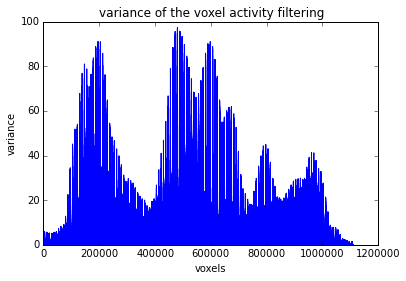

In [61]:
plt.plot(v)
plt.xlabel("voxels")
plt.ylabel("variance")
plt.title("variance of the voxel activity filtering")
plt.savefig("../figure/voxel_variance_on_smoothed_data.jpg")

In [37]:
len(v)

1108800

In [52]:
mask55468 = v>13
print sum(mask55468)
np.save('../brain_mask/sm_mask55468.npy',mask55468)

In [54]:
mask17887 = v>23
print sum(mask17887)
np.save('../brain_mask/sm_mask17887.npy',mask17887)

In [56]:
mask9051 = v>33
print sum(mask9051)
np.save('../brain_mask/sm_mask9051.npy',mask9051)

9051
